<a href="https://colab.research.google.com/github/mhmd2015/ImageProcessing1UIC/blob/main/DIP_UIC_MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Testing

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

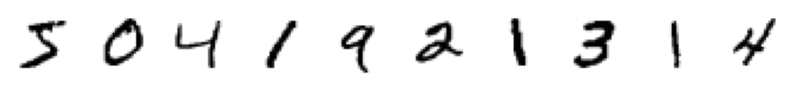

In [7]:
samples=10
# test and show the first 10 images in the training image set
_, ax = plt.subplots(1, samples, figsize=(10,10))

for i in range(0, samples):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

# test and show first 10 labels  of the correspond
train_labels[0:samples]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

**Build the neural network**

Now build the neural network. We'll be using a number of convolutional layers. Note that we only have to specify the input shape in the first layer. The last layer provides the output. It has 10 units (one for each digit 0 to 9) and uses a softmax activation to map the output of a network to a probability distribution over the predicted output classes.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

NameError: ignored

In [97]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

NameError: ignored

In [12]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

KeyError: ignored

In [13]:
preds = model.predict(test_images)

313/313 [==============================] - 2s 8ms/step


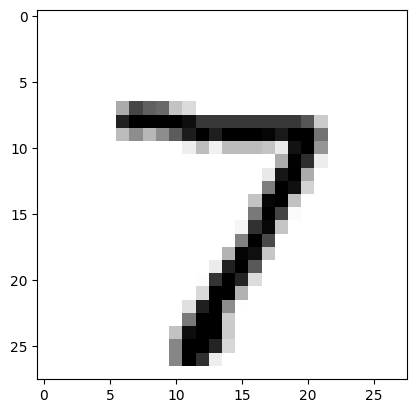

In [25]:
# reload the test images so it will be in a format imshow() will understand
(_, _), (test_images, _) = mnist.load_data()

plt.imshow(test_images[0], cmap=plt.cm.binary)

In [26]:
print(preds[0])

[9.9672326e-10 6.5008933e-08 1.4046759e-06 1.7798262e-05 9.9545028e-10
 4.8169760e-08 2.0956998e-13 9.9998015e-01 3.6164622e-07 1.0895922e-07]


In [27]:
np.argmax(preds[0])

7

0

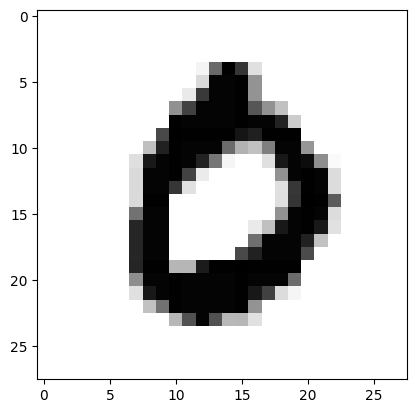

In [24]:
img_no=3

plt.imshow(test_images[img_no], cmap=plt.cm.binary)
np.argmax(preds[img_no])


# Test

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:

a1 = np.array([0,1,0])
b1 = np.array([0,1,1])
c1 = np.array([1,1,1])
d1 = np.array([0,0,1])

u1 = (a1+b1+c1+d1)/4




#vr1= ((a1-u1)+(b1-u1)+(c1-u1)+(d1-u1))
vr1 = u1/4
print(vr1)

[0.0625 0.1875 0.1875]


In [84]:

a2 = np.array([0,1,0])
b2 = np.array([1,0,1])
c2 = np.array([1,1,1])
d2 = np.array([1,0,1])

u2 = (a2+b2+c2+d2)/4

print(u2)

#vr2= ((a2-u2)+(b2-u2)+(c2-u2)+(d2-u2))/4
vr2 = u2/4
print(vr2)

[0.75 0.5  0.75]
[0.1875 0.125  0.1875]


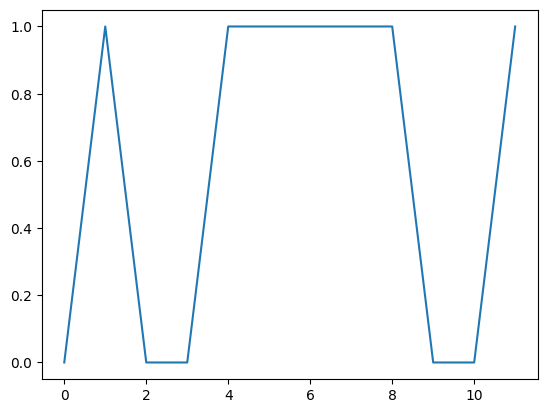

In [43]:
cc = np.concatenate((a1,b1,c1,d1))
plt.plot(cc)

In [96]:

# Given means and variances (you should calculate actual variances)
#mean_class1 = np.array([0.25, 0.75, 0.75])
#variance_class1 = np.array([-0.75 -2.25 -2.25])

#mean_class2 = np.array([0.75, 0.50, 0.75])
#variance_class2 = np.array([-2.25 -1.5  -2.25])

mean_class1 = np.array(u1)
variance_class1 = np.array(abs(vr1))

mean_class2 = np.array(u2)
variance_class2 = np.array(abs(vr2))



new_vector = np.array([1, 0, 0])

# Compute probabilities using Gaussian PDF
prob_class1 = np.prod(1 / np.sqrt(2 * np.pi * variance_class1) * np.exp(- (new_vector - mean_class1)**2 / (2 * variance_class1)))
prob_class2 = np.prod(1 / np.sqrt(2 * np.pi * variance_class2) * np.exp(- (new_vector - mean_class2)**2 / (2 * variance_class2)))

# Compare probabilities and classify
classified_class = 1 if prob_class1 > prob_class2 else 2
print(f"The new vector [100] is classified as Class {classified_class}.")

print(prob_class1,prob_class2)


The new vector [100] is classified as Class 2.
0.0007491698696338246 0.06655110954894569


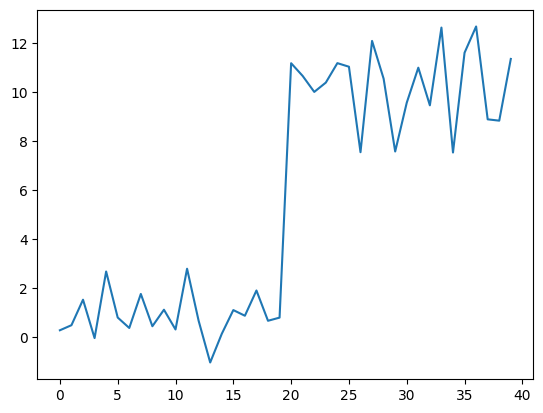

In [30]:
import matplotlib.pyplot as plt
aa = np.random.normal(1,1,20)
bb = np.random.normal(10,2,20)
cc = np.concatenate((aa,bb))
plt.plot(cc)